In [33]:
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl

import scipy.ndimage as nd
import matplotlib.pyplot as plt
#from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature
from skimage import filters as skfl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def showme(image, ax=None, cmap=None):
    if ax is None:
        ax = pl.figure(figsize=(10,10)).add_subplot(111)

    if cmap is None:
        ax.imshow(image)
    else:
        ax.imshow(image, cmap=cmap)
    ax.axis('off')
    

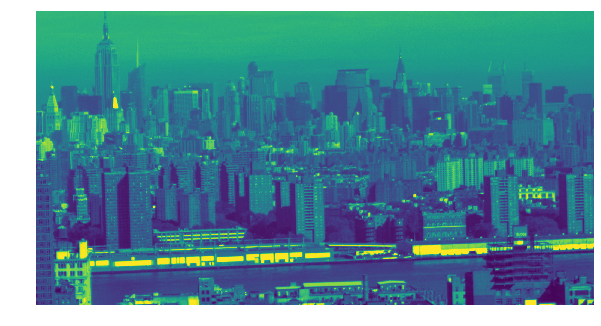

In [3]:
rawimg = np.fromfile("img1.raw", np.uint8)
rawimg = rawimg.reshape([2160,4096,3])
imgsq = rawimg.astype(float)**1
imgsq *= 255 / imgsq.max()
img2d = (imgsq.reshape([2160,4096,3]).sum(2) / 3.).astype(float)
img2d /= img2d.max()
showme(img2d)

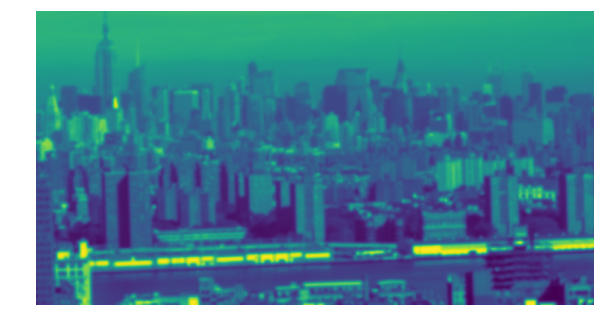

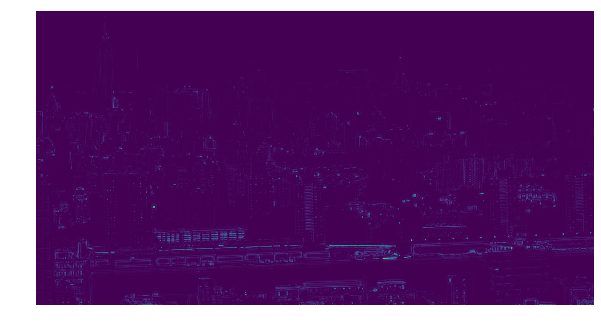

In [27]:
smoothImg = nd.filters.gaussian_filter(img2d, [10, 10])
showme(smoothImg)
showme((img2d - smoothImg)**2)
pl.savefig("smoothedDiff.png")

(array([ 364.,  205.,  196.,  111.,   68.,   31.,    8.,    7.,    1.,    1.]),
 array([ 0.15000879,  0.1601418 ,  0.1702748 ,  0.18040781,  0.19054082,
         0.20067383,  0.21080683,  0.22093984,  0.23107285,  0.24120586,
         0.25133887]),
 <a list of 10 Patch objects>)

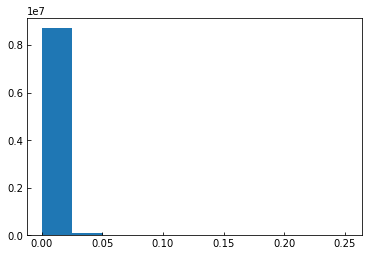

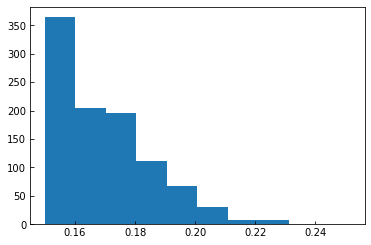

In [28]:
smoffsq = (img2d - smoothImg)**2
pl.hist(smoffsq.flatten())
np.where(smoffsq == smoffsq.max())
pl.figure()
pl.hist(smoffsq[smoffsq > 0.15].flatten())



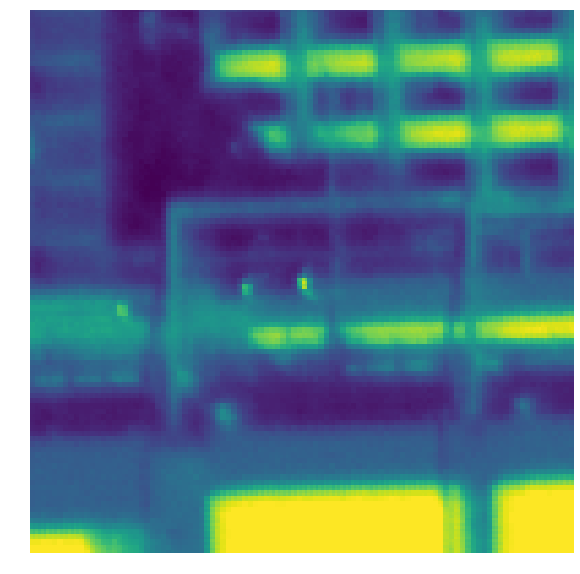

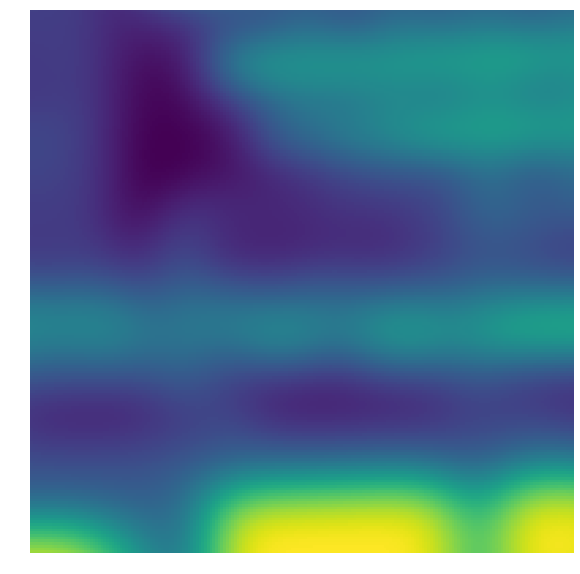

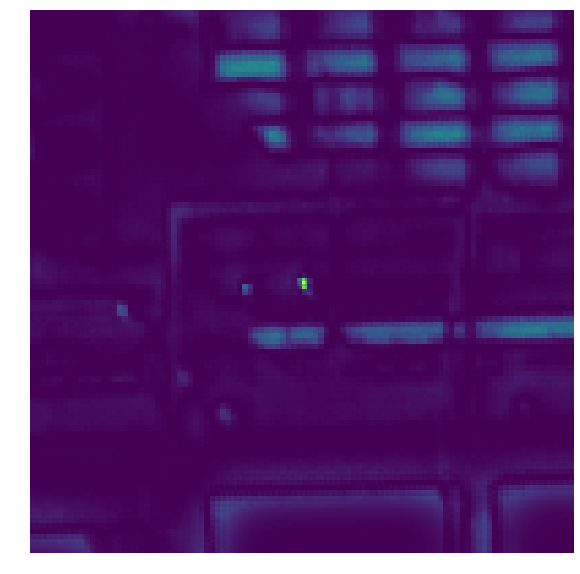

In [29]:
showme(img2d[1639:1839, 822:1022])
showme(smoothImg[1639:1839, 822:1022])
showme((img2d[1639:1839, 822:1022] - smoothImg[1639:1839, 822:1022])**2)
pl.savefig("smoothedDiff.png")

In [35]:
#skfl.sobel?

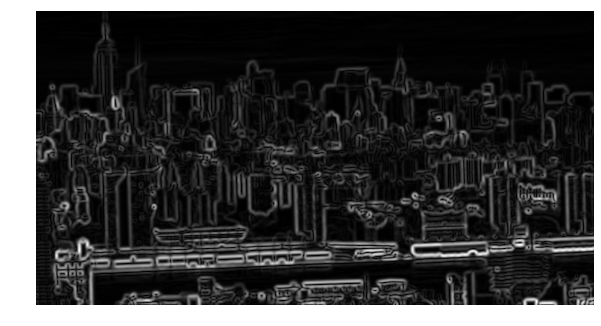

In [41]:
imgedge = sobel(smoothImg)
showme(imgedge, cmap = 'gray')

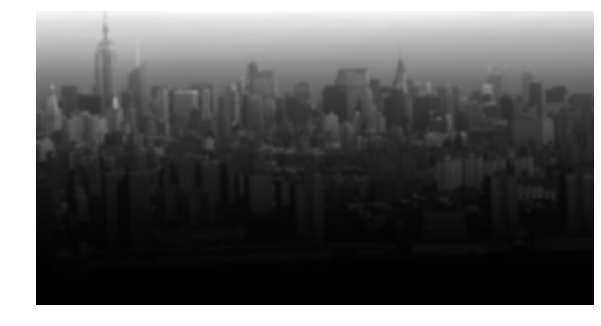

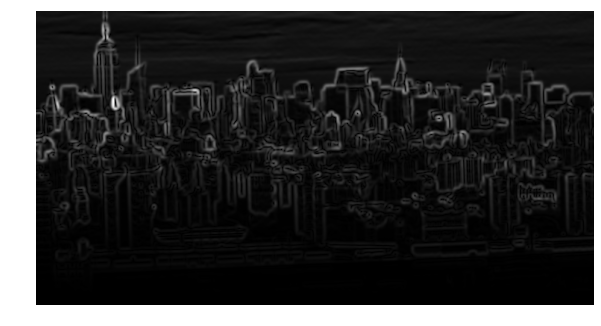

In [67]:
smoothImgEn = smoothImg[:,:] * (np.atleast_2d(np.linspace(1, 0, smoothImg.shape[0])).T)**2
imgedge = sobel(smoothImgEn )
showme(smoothImgEn, cmap = 'gray')
showme(imgedge, cmap = 'gray')

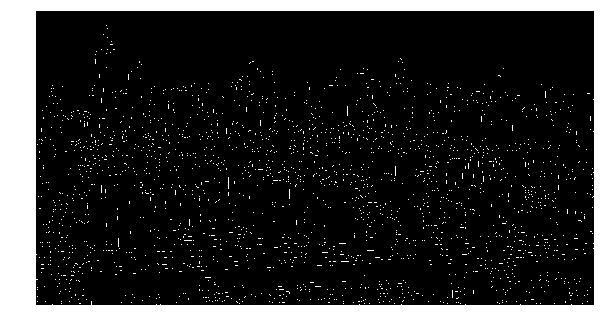

In [49]:
edges1 = feature.canny(img2d, sigma=10, use_quantiles=True, low_threshold=0.6, high_threshold=0.6)
showme(edges1, cmap = 'gray')

In [44]:
feature.canny?